# Examining risk factors associated with CVE

> using CVE metadata retrieved from local instance of [CVE Search](https://github.com/cve-search/cve-search)
> with the help of `dependency_search/retrieve_cve_info.py` script

See [MSR 2023 CVE](https://docs.google.com/spreadsheets/d/1yUXKMNrwUA4t0wH4_c8kVLwmEKmOGjt9sj_nHUofmGo) Google Sheet

Imports

In [1]:
import pandas as pd

## Exploring `data/unique_cve_info-cvss_cwe_etc.parquet`

In [2]:
df_filename='../../data/unique_cve_info-cvss_cwe_etc.parquet'
df_filename

'../../data/unique_cve_info-cvss_cwe_etc.parquet'

In [3]:
df=pd.read_parquet(df_filename)
df

,cve,cvss,cwe,error,cvss-vector,access.authentication,access.complexity,access.vector,impact.availability,impact.confidentiality,impact.integrity
0,CVE-2014-2972,4.6,CWE-189,<NA>,AV:L/AC:L/Au:N/C:P/I:P/A:P,NONE,LOW,LOCAL,PARTIAL,PARTIAL,PARTIAL
1,CVE-2014-3470,4.3,CWE-310,<NA>,AV:N/AC:M/Au:N/C:N/I:N/A:P,NONE,MEDIUM,NETWORK,PARTIAL,NONE,NONE
2,CVE-2013-2231,7.2,CWE-399,<NA>,AV:L/AC:L/Au:N/C:C/I:C/A:C,NONE,LOW,LOCAL,COMPLETE,COMPLETE,COMPLETE
3,CVE-2012-4405,6.8,CWE-189,<NA>,AV:N/AC:M/Au:N/C:P/I:P/A:P,NONE,MEDIUM,NETWORK,PARTIAL,PARTIAL,PARTIAL
4,CVE-2016-0728,7.2,NVD-CWE-Other,<NA>,AV:L/AC:L/Au:N/C:C/I:C/A:C,NONE,LOW,LOCAL,COMPLETE,COMPLETE,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...
65926,CVE-2022-22332,5.0,CWE-672,<NA>,AV:N/AC:L/Au:N/C:N/I:P/A:N,NONE,LOW,NETWORK,NONE,NONE,PARTIAL
65927,CVE-2022-22327,5.0,CWE-327,<NA>,AV:N/AC:L/Au:N/C:P/I:N/A:N,NONE,LOW,NETWORK,NONE,PARTIAL,NONE
65928,CVE-2021-43257,6.0,CWE-1236,<NA>,AV:N/AC:M/Au:S/C:P/I:P/A:P,SINGLE,MEDIUM,NETWORK,PARTIAL,PARTIAL,PARTIAL
65929,CVE-2021-43286,6.5,CWE-77,<NA>,AV:N/AC:L/Au:S/C:P/I:P/A:P,SINGLE,LOW,NETWORK,PARTIAL,PARTIAL,PARTIAL


In [4]:
df.shape

(65931, 11)

In [5]:
df.columns

Index(['cve', 'cvss', 'cwe', 'error', 'cvss-vector', 'access.authentication',
       'access.complexity', 'access.vector', 'impact.availability',
       'impact.confidentiality', 'impact.integrity'],
      dtype='object')

In [20]:
cvss_factor_columns=[column_name for column_name in df.columns if "." in column_name]
cvss_factor_columns

['access.authentication',
 'access.complexity',
 'access.vector',
 'impact.availability',
 'impact.confidentiality',
 'impact.integrity']

In [12]:
df['error'].unique()

<StringArray>
[<NA>, "'cvss'"]
Length: 2, dtype: string

In [31]:
df.value_counts('error')

error
'cvss'    2766
dtype: int64

In [32]:
df['error'].dropna()

147      'cvss'
469      'cvss'
493      'cvss'
595      'cvss'
641      'cvss'
          ...  
65900    'cvss'
65901    'cvss'
65902    'cvss'
65906    'cvss'
65911    'cvss'
Name: error, Length: 2766, dtype: string

### The Common Vulnerability Scoring System (CVSS), and CVSS Ratings

See https://nvd.nist.gov/vuln-metrics/cvss<br>
See https://www.first.org/cvss/specification-document#Qualitative-Severity-Rating-Scale

In [6]:
df['cvss'].describe()

count    63165.000000
mean         5.784938
std          1.950292
min          0.000000
25%          4.300000
50%          5.000000
75%          7.200000
max         10.000000
Name: cvss, dtype: float64

CVSS v2.0 Ratings

https://nvd.nist.gov/vuln-metrics/cvss

- Low	    : 0.0-3.9 
- Medium	: 4.0-6.9 
- High	    : 7.0-10.0 

In [38]:
cvss2r_s = pd.cut(df['cvss'],
                  bins=[0,4,7,10.1],right=False,include_lowest=True,
                  labels=['Low','Medium','High'])
df['CVSS v2.0 Ratings'] = cvss2r_s
df.value_counts('CVSS v2.0 Ratings')

CVSS v2.0 Ratings
Medium    39042
High      17453
Low        6670
dtype: int64

<AxesSubplot: xlabel='CVSS v2.0 Ratings', ylabel='CVEs'>

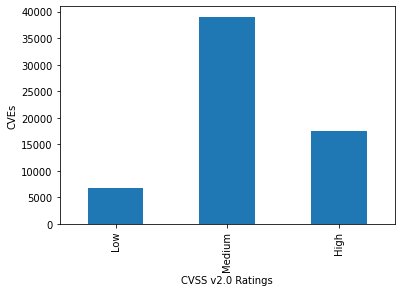

In [50]:
df.value_counts('CVSS v2.0 Ratings')[['Low','Medium','High']].plot.bar(ylabel='CVEs')

CVSS v3.1 Ratings

https://nvd.nist.gov/vuln-metrics/cvss<br>
https://www.first.org/cvss/specification-document#Qualitative-Severity-Rating-Scale

- None      : 0.0
- Low	    : 0.1-3.9 
- Medium	: 4.0-6.9 
- High	    : 7.0-8.9 
- Critical  : 9.0-10.0

In [46]:
cvss3r_s = pd.cut(df['cvss'],
                  bins=[0,0.1,4,7,9,10.1],right=False,include_lowest=True,
                  labels=['None','Low','Medium','High','Critical'])
df['CVSS v3.1 Ratings'] = cvss3r_s
df.value_counts('CVSS v3.1 Ratings')

CVSS v3.1 Ratings
Medium      39042
High        11075
Low          6666
Critical     6378
None            4
dtype: int64

<AxesSubplot: xlabel='CVSS v3.1 Ratings', ylabel='CVEs'>

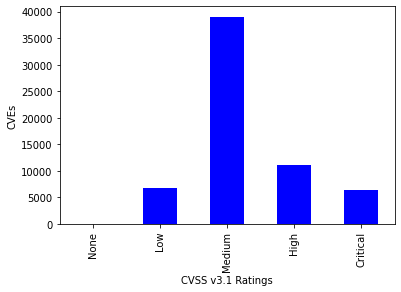

In [51]:
df.value_counts('CVSS v3.1 Ratings')[['None','Low','Medium','High','Critical']].plot(kind='bar', ylabel='CVEs',color='b')

In [76]:
cvss_count=df['cvss'].count()

value_counts_perc=100.0*df.value_counts('CVSS v3.1 Ratings')[['None','Low','Medium','High','Critical']]/cvss_count
value_counts_perc

CVSS v3.1 Ratings
None         0.006333
Low         10.553313
Medium      61.809546
High        17.533444
Critical    10.097364
dtype: float64

In [79]:
print(f"With CVSS are {100.0*cvss_count/df.shape[0]} of all entries (incl. errors)")

With CVSS are 95.80470491877873 of all entries (incl. errors)


In [83]:
df[df['cvss'].isna()]

,cve,cvss,cwe,error,cvss-vector,access.authentication,access.complexity,access.vector,impact.availability,impact.confidentiality,impact.integrity,CVSS v2.0 Ratings,CVSS v3.1 Ratings
147,CVE-2013-1752,<NA>,<NA>,'cvss',<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
469,CVE-2013-6405,<NA>,<NA>,'cvss',<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
493,CVE-2014-2970,<NA>,<NA>,'cvss',<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
595,CVE-2013-1877,<NA>,<NA>,'cvss',<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
641,CVE-2008-4422,<NA>,<NA>,'cvss',<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65900,CVE-2021-1000593,<NA>,<NA>,'cvss',<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
65901,CVE-2021-1000107,<NA>,<NA>,'cvss',<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
65902,CVE-2021-1000704,<NA>,<NA>,'cvss',<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
65906,CVE-2021-38601,<NA>,<NA>,'cvss',<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN


<AxesSubplot: xlabel='CVSS v3.1 Ratings', ylabel='% of CVSS'>

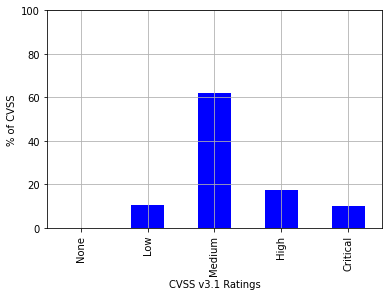

In [75]:
value_counts_perc.plot(kind='bar', ylabel='% of CVSS', color='b', ylim=(0,100), grid=True)

### CVSS Factors: access.authentication, etc.

In [85]:
print(f"df.shape={df.shape}")
print(f"access.*={df['access.authentication'].count()}")
print(f"impact.*={df['impact.availability'].count()}")
print("")
print(f"cvss    ={df['cvss'].count()}")

df.shape=(65931, 13)
access.*=63165
impact.*=63165

cvss    =63165


In [21]:
for col in cvss_factor_columns:
    print(f"{col}: {','.join(df[col].dropna().unique())}")

access.authentication: NONE,SINGLE,MULTIPLE
access.complexity: LOW,MEDIUM,HIGH
access.vector: LOCAL,NETWORK,ADJACENT_NETWORK
impact.availability: PARTIAL,COMPLETE,NONE
impact.confidentiality: PARTIAL,NONE,COMPLETE
impact.integrity: PARTIAL,NONE,COMPLETE


In [30]:
for col in cvss_factor_columns:
    print(df.value_counts(col))
    print('')

access.authentication
NONE        52800
SINGLE      10337
MULTIPLE       28
dtype: int64

access.complexity
LOW       35237
MEDIUM    25774
HIGH       2154
dtype: int64

access.vector
NETWORK             52249
LOCAL                9830
ADJACENT_NETWORK     1086
dtype: int64

impact.availability
PARTIAL     27809
NONE        21694
COMPLETE    13662
dtype: int64

impact.confidentiality
PARTIAL     29502
NONE        22813
COMPLETE    10850
dtype: int64

impact.integrity
PARTIAL     29439
NONE        23252
COMPLETE    10474
dtype: int64



In [86]:
for col in cvss_factor_columns:
    print(100.0*df.value_counts(col)/cvss_count)
    print('')

access.authentication
NONE        83.590596
SINGLE      16.365076
MULTIPLE     0.044328
dtype: float64

access.complexity
LOW       55.785641
MEDIUM    40.804243
HIGH       3.410116
dtype: float64

access.vector
NETWORK             82.718278
LOCAL               15.562416
ADJACENT_NETWORK     1.719307
dtype: float64

impact.availability
PARTIAL     44.025964
NONE        34.344970
COMPLETE    21.629067
dtype: float64

impact.confidentiality
PARTIAL     46.706246
NONE        36.116520
COMPLETE    17.177234
dtype: float64

impact.integrity
PARTIAL     46.606507
NONE        36.811525
COMPLETE    16.581968
dtype: float64



In [66]:
df_impact=pd.DataFrame()
for col in ['impact.availability','impact.confidentiality','impact.integrity']:
    df_impact[col] = df.value_counts(col)
    
df_impact=df_impact.reindex(['NONE','PARTIAL','COMPLETE']).rename_axis(None, axis=1)
df_impact.index.name=None

df_impact

,impact.availability,impact.confidentiality,impact.integrity
NONE,21694,22813,23252
PARTIAL,27809,29502,29439
COMPLETE,13662,10850,10474


<AxesSubplot: >

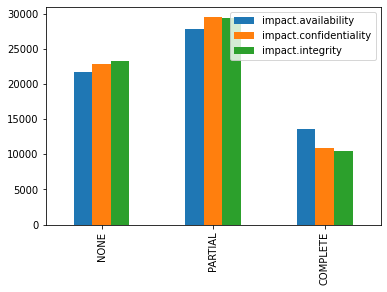

In [67]:
df_impact.plot.bar()

<AxesSubplot: >

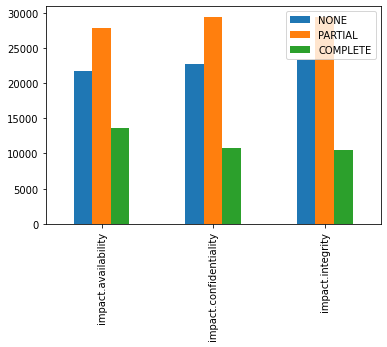

In [68]:
df_impact.transpose().plot.bar()

In [53]:
df.value_counts(subset=['impact.availability','impact.confidentiality','impact.integrity'])

impact.availability  impact.confidentiality  impact.integrity
PARTIAL              PARTIAL                 PARTIAL             16664
COMPLETE             COMPLETE                COMPLETE            10295
PARTIAL              NONE                    NONE                 9526
NONE                 PARTIAL                 NONE                 9374
                     NONE                    PARTIAL              9195
COMPLETE             NONE                    NONE                 3075
NONE                 PARTIAL                 PARTIAL              2575
PARTIAL              NONE                    PARTIAL               852
                     PARTIAL                 NONE                  743
NONE                 COMPLETE                NONE                  447
COMPLETE             PARTIAL                 PARTIAL                89
                     NONE                    COMPLETE               84
                     PARTIAL                 NONE                   53
NONE           

### Common Weakness Enumeration (CWE™)

Common Weakness Enumeration identifiers are structured in a hierarchy.

There are various ways to categorize CWE into different types of categories:
- [2022 CWE Top 25 Most Dangerous Software Weaknesses](https://cwe.mitre.org/top25/archive/2022/2022_cwe_top25.html), a binary hierarchy
- **[CWE VIEW (1000): Research Concepts](https://cwe.mitre.org/data/definitions/1000.html)**: 10 top level categories (pillars)
- [CWE VIEW (699): Software Development](https://cwe.mitre.org/data/definitions/699.html): 40 top level categories
- [CWE VIEW (1008): Architectural Concepts](https://cwe.mitre.org/data/definitions/1008.html): 12 top level categories
- [CWE VIEW (1003): Weaknesses for Simplified Mapping of Published Vulnerabilities](https://cwe.mitre.org/data/definitions/1003.html): 37 top level categories

About <u>CWE VIEW: Research Concepts</u>:

> This view is intended to facilitate research into weaknesses, including their inter-dependencies, and can be leveraged to systematically identify theoretical gaps within CWE. It is mainly organized according to abstractions of behaviors instead of how they can be detected, where they appear in code, or when they are introduced in the development life cycle. By design, this view is expected to include every weakness within CWE.

> This view uses a deep hierarchical organization, with more levels of abstraction than other classification schemes. The top-level entries are called Pillars. Where possible, this view uses abstractions that do not consider particular languages, frameworks, technologies, life cycle development phases, frequency of occurrence, or types of resources. It explicitly identifies relationships that form chains and composites, which have not been a formal part of past classification efforts. Chains and composites might help explain why mutual exclusivity is difficult to achieve within security error taxonomies. This view is roughly aligned with MITRE's research into vulnerability theory, especially with respect to behaviors and resources. Ideally, this view will only cover weakness-to-weakness relationships, with minimal overlap and zero categories. It is expected to include at least one parent/child relationship for every weakness within CWE.

In [88]:
cwe_1000_df=pd.read_csv('https://cwe.mitre.org/data/csv/1000.csv.zip')
cwe_1000_df

,CWE-ID,Name,Weakness Abstraction,Status,Description,Extended Description,Related Weaknesses,Weakness Ordinalities,Applicable Platforms,Background Details,...,Likelihood of Exploit,Common Consequences,Detection Methods,Potential Mitigations,Observed Examples,Functional Areas,Affected Resources,Taxonomy Mappings,Related Attack Patterns,Notes
5,J2EE Misconfiguration: Data Transmission Witho...,Variant,Draft,Information sent over a network can be comprom...,NaN,::NATURE:ChildOf:CWE ID:319:VIEW ID:1000:ORDIN...,NaN,::LANGUAGE NAME:Java:LANGUAGE PREVALENCE:Undet...,NaN,NaN,...,::SCOPE:Confidentiality:IMPACT:Read Applicatio...,NaN,::PHASE:System Configuration:DESCRIPTION:The a...,NaN,NaN,NaN,::TAXONOMY NAME:7 Pernicious Kingdoms:ENTRY NA...,NaN,::TYPE:Other:NOTE:If an application uses SSL t...,NaN
6,J2EE Misconfiguration: Insufficient Session-ID...,Variant,Incomplete,The J2EE application is configured to use an i...,If an attacker can guess or steal a session ID...,::NATURE:ChildOf:CWE ID:334:VIEW ID:1000:ORDIN...,NaN,::LANGUAGE NAME:Java:LANGUAGE PREVALENCE:Undet...,::Session ID's can be used to identify communi...,NaN,...,::SCOPE:Access Control:IMPACT:Gain Privileges ...,NaN,::PHASE:Implementation:DESCRIPTION:Session ide...,NaN,NaN,NaN,::TAXONOMY NAME:7 Pernicious Kingdoms:ENTRY NA...,::21::59::,NaN,NaN
7,J2EE Misconfiguration: Missing Custom Error Page,Variant,Incomplete,The default error page of a web application sh...,A Web application must define a default error ...,::NATURE:ChildOf:CWE ID:756:VIEW ID:1000:ORDIN...,NaN,::LANGUAGE NAME:Java:LANGUAGE PREVALENCE:Undet...,NaN,NaN,...,::SCOPE:Confidentiality:IMPACT:Read Applicatio...,NaN,::PHASE:Implementation:DESCRIPTION:Handle exce...,NaN,NaN,NaN,::TAXONOMY NAME:7 Pernicious Kingdoms:ENTRY NA...,NaN,NaN,NaN
8,J2EE Misconfiguration: Entity Bean Declared Re...,Variant,Incomplete,When an application exposes a remote interface...,NaN,::NATURE:ChildOf:CWE ID:668:VIEW ID:1000:ORDIN...,NaN,NaN,NaN,NaN,...,::SCOPE:Confidentiality:SCOPE:Integrity:IMPACT...,NaN,::PHASE:Implementation:DESCRIPTION:Declare Jav...,NaN,NaN,NaN,::TAXONOMY NAME:7 Pernicious Kingdoms:ENTRY NA...,NaN,::TYPE:Other:NOTE:Entity beans that expose a r...,NaN
9,J2EE Misconfiguration: Weak Access Permissions...,Variant,Draft,If elevated access rights are assigned to EJB ...,If the EJB deployment descriptor contains one ...,::NATURE:ChildOf:CWE ID:266:VIEW ID:1000:ORDIN...,NaN,NaN,NaN,NaN,...,::SCOPE:Other:IMPACT:Other::,NaN,::PHASE:Architecture and Design System Configu...,NaN,NaN,NaN,::TAXONOMY NAME:7 Pernicious Kingdoms:ENTRY NA...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,Weak Authentication,Class,Incomplete,The product uses an authentication mechanism t...,Attackers may be able to bypass weak authentic...,::NATURE:ChildOf:CWE ID:287:VIEW ID:1000:ORDIN...,NaN,::LANGUAGE CLASS:Not Language-Specific:LANGUAG...,NaN,NaN,...,::SCOPE:Integrity:SCOPE:Confidentiality:SCOPE:...,NaN,NaN,::REFERENCE:CVE-2022-30034:DESCRIPTION:Chain: ...,NaN,NaN,NaN,NaN,NaN,NaN
1391,Use of Weak Credentials,Class,Incomplete,The product uses weak credentials (such as a d...,"By design, authentication protocols try to ens...",::NATURE:ChildOf:CWE ID:1390:VIEW ID:1000:ORDI...,NaN,::LANGUAGE CLASS:Not Language-Specific:LANGUAG...,NaN,NaN,...,NaN,NaN,NaN,::REFERENCE:CVE-2022-30271:DESCRIPTION:Remote ...,NaN,NaN,NaN,NaN,NaN,NaN
1392,Use of Default Credentials,Base,Incomplete,The product uses default credentials (such as ...,It is common practice for products to be desig...,::NATURE:ChildOf:CWE ID:1391:VIEW ID:1000:ORDI...,NaN,::LANGUAGE CLASS:Not Language-Specific:LANGUAG...,NaN,NaN,...,::SCOPE:Authentication:IMPACT:Gain Privileges ...,NaN,::PHASE:Requirements:DESCRIPTION:Prohibit use ...,::REFERENCE:CVE-2021-41192:DESCRIPTION:data vi...,NaN,NaN,NaN,NaN,NaN,NaN
1393,Use of Default Password,Base,Incomplete,The product uses default passwords for potenti...,It is common practice for products to 

In [136]:
cwe_1000_df[cwe_1000_df['CWE-ID']=='Improper Access Control']

,CWE-ID,Name,Weakness Abstraction,Status,Description,Extended Description,Related Weaknesses,Weakness Ordinalities,Applicable Platforms,Background Details,...,Likelihood of Exploit,Common Consequences,Detection Methods,Potential Mitigations,Observed Examples,Functional Areas,Affected Resources,Taxonomy Mappings,Related Attack Patterns,Notes
284,Improper Access Control,Pillar,Incomplete,The software does not restrict or incorrectly ...,Access control involves the use of several pro...,NaN,NaN,NaN,NaN,::TERM:Authorization:DESCRIPTION:The terms acc...,...,::SCOPE:Other:IMPACT:Varies by Context::,NaN,::PHASE:Architecture and Design Operation:DESC...,::REFERENCE:CVE-2021-21972:DESCRIPTION:Chain: ...,NaN,::File or Directory::,::TAXONOMY NAME:PLOVER:ENTRY NAME:Access Contr...,::19::441::478::479::502::503::536::546::550::...,::TYPE:Mapping:NOTE:Use for Mapping: Discourag...,NaN


In [139]:
cwe_1000_df[cwe_1000_df['Name']=='Pillar']

,CWE-ID,Name,Weakness Abstraction,Status,Description,Extended Description,Related Weaknesses,Weakness Ordinalities,Applicable Platforms,Background Details,...,Likelihood of Exploit,Common Consequences,Detection Methods,Potential Mitigations,Observed Examples,Functional Areas,Affected Resources,Taxonomy Mappings,Related Attack Patterns,Notes
284,Improper Access Control,Pillar,Incomplete,The software does not restrict or incorrectly ...,Access control involves the use of several pro...,NaN,NaN,NaN,NaN,::TERM:Authorization:DESCRIPTION:The terms acc...,...,::SCOPE:Other:IMPACT:Varies by Context::,NaN,::PHASE:Architecture and Design Operation:DESC...,::REFERENCE:CVE-2021-21972:DESCRIPTION:Chain: ...,NaN,::File or Directory::,::TAXONOMY NAME:PLOVER:ENTRY NAME:Access Contr...,::19::441::478::479::502::503::536::546::550::...,::TYPE:Mapping:NOTE:Use for Mapping: Discourag...,NaN
435,Improper Interaction Between Multiple Correctl...,Pillar,Draft,An interaction error occurs when two entities ...,When a system or process combines multiple ind...,NaN,NaN,::LANGUAGE CLASS:Not Language-Specific:LANGUAG...,NaN,::TERM:Interaction Error::TERM:Emergent Fault::,...,::SCOPE:Integrity:IMPACT:Unexpected State:IMPA...,NaN,NaN,NaN,NaN,NaN,::TAXONOMY NAME:PLOVER:ENTRY NAME:Interaction ...,NaN,::TYPE:Relationship:NOTE:The Interaction Error...,NaN
664,Improper Control of a Resource Through its Lif...,Pillar,Draft,The software does not maintain or incorrectly ...,Resources often have explicit instructions on ...,NaN,NaN,::LANGUAGE CLASS:Not Language-Specific:LANGUAG...,NaN,NaN,...,::SCOPE:Other:IMPACT:Other::,NaN,::PHASE:Testing:DESCRIPTION:Use Static analysi...,NaN,NaN,NaN,::TAXONOMY NAME:CERT C Secure Coding:ENTRY ID:...,::196::21::60::61::62::,::TYPE:Maintenance:NOTE:More work is needed on...,NaN
682,Incorrect Calculation,Pillar,Draft,The software performs a calculation that gener...,When software performs a security-critical cal...,::NATURE:CanPrecede:CWE ID:170:VIEW ID:1000::,NaN,::LANGUAGE CLASS:Not Language-Specific:LANGUAG...,NaN,NaN,...,"::SCOPE:Availability:IMPACT:DoS: Crash, Exit, ...",::METHOD:Manual Analysis:DESCRIPTION:This weak...,::PHASE:Implementation:DESCRIPTION:Understand ...,::REFERENCE:CVE-2020-0022:DESCRIPTION:chain: m...,NaN,NaN,::TAXONOMY NAME:CERT C Secure Coding:ENTRY ID:...,::128::129::,NaN,NaN
691,Insufficient Control Flow Management,Pillar,Draft,The code does not sufficiently manage its cont...,NaN,NaN,NaN,::LANGUAGE CLASS:Not Language-Specific:LANGUAG...,NaN,NaN,...,::SCOPE:Other:IMPACT:Alter Execution Logic::,NaN,NaN,NaN,NaN,NaN,::TAXONOMY NAME:WASC:ENTRY ID:40:ENTRY NAME:In...,::29::,NaN,NaN
693,Protection Mechanism Failure,Pillar,Draft,The product does not use or incorrectly uses a...,This weakness covers three distinct situations...,NaN,NaN,::LANGUAGE CLASS:Not Language-Specific:LANGUAG...,NaN,NaN,...,::SCOPE:Access Control:IMPACT:Bypass Protectio...,NaN,NaN,NaN,NaN,NaN,NaN,::1::107::127::17::20::22::237::36::477::480::...,::TYPE:Research Gap:NOTE:The concept of protec...,NaN
697,Incorrect Comparison,Pillar,Incomplete,The software compares two entities in a securi...,This weakness class covers several possibiliti...,NaN,::ORDINALITY:Primary::,::LANGUAGE CLASS:Not Language-Specific:LANGUAG...,NaN,NaN,...,::SCOPE:Other:IMPACT:Varies by Context::,NaN,NaN,::REFERENCE:CVE-2020-15811:DESCRIPTION:Chain: ...,NaN,NaN,NaN,::10::120::14::15::182::24::267::3::41::43::44...,::TYPE:Maintenance:NOTE:This entry likely has ...,NaN
703,Improper Check or Handling of Exceptional Cond...,Pillar,Incomplete,The software does not properly anticipate or h...,NaN,NaN,NaN,::LANGUAGE CLASS:Not Language-Specific:LANGUAG...,NaN,NaN,...,::SCOPE:Confidentiality:SCOPE:Availability:SCO...,::METHOD:Dynamic Analysis with Manual Results ...,NaN,NaN,NaN,NaN,::TAXONOMY NAME:The CERT Oracle Secure Coding ...,NaN,::TYPE:Relationship:NOTE:This is a high-level ...,NaN
707,Improper Neutralization,Pillar,Incomplete,The product does not ensure or incorrectly ens...,

In [141]:
cwe_1000_df['Extended Description'].head(5)

5    ::NATURE:ChildOf:CWE ID:319:VIEW ID:1000:ORDIN...
6    ::NATURE:ChildOf:CWE ID:334:VIEW ID:1000:ORDIN...
7    ::NATURE:ChildOf:CWE ID:756:VIEW ID:1000:ORDIN...
8    ::NATURE:ChildOf:CWE ID:668:VIEW ID:1000:ORDIN...
9    ::NATURE:ChildOf:CWE ID:266:VIEW ID:1000:ORDIN...
Name: Extended Description, dtype: object

In [95]:
df['cwe']

0              CWE-189
1              CWE-310
2              CWE-399
3              CWE-189
4        NVD-CWE-Other
             ...      
65926          CWE-672
65927          CWE-327
65928         CWE-1236
65929           CWE-77
65930          CWE-787
Name: cwe, Length: 65931, dtype: string

In [133]:
df['cwe no']=df['cwe']\
  .str.replace('^NVD-.*','0',regex=True)\
  .str.replace('Unknown','0')\
  .str.replace("CWE-","")\
  .fillna('0')
df['cwe no']=df['cwe no'].astype('int')

uniq=list(df['cwe no'].unique())
uniq.sort()
uniq[-5:]

print(f"{df['cwe no'].value_counts()[0]} CVEs without correct CWE out of {df.shape[0]}")

cwe_count=df.shape[0] - df['cwe no'].value_counts()[0]
print(f"{cwe_count} CVEs out of {df.shape[0]} has CWEs: {100.0*cwe_count/df.shape[0]} (including errors)")
print(f"{cwe_count} CVEs out of {cvss_count} has CWEs: {100.0*cwe_count/cvss_count} (excluding errors)")

14680 CVEs without correct CWE out of 65931
51251 CVEs out of 65931 has CWEs: 77.73429797818932 (including errors)
51251 CVEs out of 63165 has CWEs: 81.13828860919813 (excluding errors)


In [134]:
df.join()

,cve,cvss,cwe,error,cvss-vector,access.authentication,access.complexity,access.vector,impact.availability,impact.confidentiality,impact.integrity,CVSS v2.0 Ratings,CVSS v3.1 Ratings,cwe no
0,CVE-2014-2972,4.6,CWE-189,<NA>,AV:L/AC:L/Au:N/C:P/I:P/A:P,NONE,LOW,LOCAL,PARTIAL,PARTIAL,PARTIAL,Medium,Medium,189
1,CVE-2014-3470,4.3,CWE-310,<NA>,AV:N/AC:M/Au:N/C:N/I:N/A:P,NONE,MEDIUM,NETWORK,PARTIAL,NONE,NONE,Medium,Medium,310
2,CVE-2013-2231,7.2,CWE-399,<NA>,AV:L/AC:L/Au:N/C:C/I:C/A:C,NONE,LOW,LOCAL,COMPLETE,COMPLETE,COMPLETE,High,High,399
3,CVE-2012-4405,6.8,CWE-189,<NA>,AV:N/AC:M/Au:N/C:P/I:P/A:P,NONE,MEDIUM,NETWORK,PARTIAL,PARTIAL,PARTIAL,Medium,Medium,189
4,CVE-2016-0728,7.2,NVD-CWE-Other,<NA>,AV:L/AC:L/Au:N/C:C/I:C/A:C,NONE,LOW,LOCAL,COMPLETE,COMPLETE,COMPLETE,High,High,0


...unfortunately, it looks like what is provided is the **graph** of CWEs, and you need to travel it to the pillar...

Maybe [OWASP/cwe-tool](https://github.com/OWASP/cwe-tool) would help (command line tool, in Node.js, Dockerized)

In [166]:
from lxml import etree
from xml.dom import minidom
import xml.etree.ElementTree as ET

In [172]:
import requests

In [173]:
response = requests.get("https://cwe.mitre.org/data/xml/views/1000.xml.zip")

In [186]:
#tree = etree.parse("https://cwe.mitre.org/data/xml/views/1000.xml.zip")
#dom = minidom.parse("https://cwe.mitre.org/data/xml/views/1000.xml.zip")
#tree = ET.parse("https://cwe.mitre.org/data/xml/views/1000.xml.zip")

#tree = etree.parse(response.content)
#dom = minidom.parse(response.content)
#tree = ET.parse(response.content)

In [182]:
from zipfile import ZipFile
from io import BytesIO

zipfile=ZipFile(BytesIO(response.content), "r")
zipfile

<zipfile.ZipFile file=<_io.BytesIO object at 0x7fd32ffee840> mode='r'>

In [183]:
zipfile.namelist()

['1000.xml']

In [187]:
from lxml import etree

import requests
from zipfile import ZipFile
from io import BytesIO

response = requests.get("https://cwe.mitre.org/data/xml/views/1000.xml.zip")

with ZipFile(BytesIO(response.content), "r") as zipfile:
    with zipfile.open('1000.xml') as xmlfile:
        tree=etree.parse(xmlfile)

In [188]:
tree

In [253]:
root.xpath('local-name()')

'Weakness_Catalog'

In [211]:
tree.xpath('*')

[<Element {http://cwe.mitre.org/cwe-6}Weaknesses at 0x7fd2e6de2880>,
 <Element {http://cwe.mitre.org/cwe-6}Categories at 0x7fd2e6da4a80>,
 <Element {http://cwe.mitre.org/cwe-6}Views at 0x7fd2e6da5980>,
 <Element {http://cwe.mitre.org/cwe-6}External_References at 0x7fd2e6da6f00>]

In [255]:
root.xpath('.')

[<Element {http://cwe.mitre.org/cwe-6}Weakness_Catalog at 0x7fd32f6cbb40>]

In [221]:
root = tree.getroot()

for child in root:
     print(child.tag, child.attrib)

{http://cwe.mitre.org/cwe-6}Weaknesses {}
{http://cwe.mitre.org/cwe-6}Categories {}
{http://cwe.mitre.org/cwe-6}Views {}
{http://cwe.mitre.org/cwe-6}External_References {}


In [267]:
import networkx as nx

In [257]:
G = nx.DiGraph()

In [258]:
# unoptimized code

for child in root[0]:
    lname = etree.QName(child).localname
    if lname == 'Weakness':
        for subchild in child:
            if etree.QName(subchild).localname == 'Related_Weaknesses':
                for subsubchild in subchild:
                    if etree.QName(subsubchild).localname == 'Related_Weakness' and subsubchild.attrib['Nature'] == 'ChildOf':
                        #print(child.attrib['ID'], subsubchild.attrib['CWE_ID'])
                        G.add_edge(child.attrib['ID'], subsubchild.attrib['CWE_ID'])
                        
G

In [259]:
G.number_of_nodes()

933

In [273]:
# https://stackoverflow.com/questions/74175462/attributeerror-module-scipy-sparse-has-no-attribute-coo-array
#
# this didn't help
# - upgrade scipy
!pip install 'scipy>=1.8'
# - or downgrade networkx
#!pip install 'networkx<2.7'

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
  Using cached networkx-2.8.8-py3-none-any.whl (2.0 MB)
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [271]:
# results in AttributeError: module 'scipy.sparse' has no attribute 'coo_array'
#nx.draw(G, with_labels=True)

In [286]:
G_leaves=[x for x in G.nodes() if G.out_degree(x)==0]
sorted(G_leaves)

['284', '435', '664', '682', '691', '693', '697', '703', '707', '710']

In [293]:
pillar={}

# it can be any post-order ordering
nodelist = nx.dfs_postorder_nodes(G)
for node in nodelist:
    if G.out_degree(node) == 0:
        pillar[node] = [node]
        continue
    
    # gather flattened list
    pillar[node] = sum([pillar[neigh] 
                        for neigh in G.successors(node)
                        if neigh in pillar],[])
  
pillar

{'284': ['284'],
 '285': ['284'],
 '664': ['664'],
 '668': ['664'],
 '732': ['284', '664'],
 '1004': ['284', '664'],
 '710': ['710'],
 '684': ['710'],
 '221': ['664'],
 '451': ['710', '664'],
 '1007': ['710', '664'],
 '707': ['707'],
 '74': ['707'],
 '99': ['707'],
 '573': ['710'],
 '694': ['707', '710'],
 '20': ['707'],
 '1173': ['707'],
 '102': ['707', '710', '707', '707'],
 '610': ['664'],
 '441': ['664'],
 '1021': ['664', '664', '710', '664'],
 '269': ['284'],
 '266': ['284'],
 '1022': ['284'],
 '697': ['697'],
 '1023': ['697'],
 '1024': ['697'],
 '1025': ['697'],
 '103': ['710', '707'],
 '435': ['435'],
 '758': ['710'],
 '1038': ['435', '710'],
 '1037': ['435', '710'],
 '693': ['693'],
 '1039': ['693', '697'],
 '104': ['710', '707'],
 '1041': ['710'],
 '405': ['664'],
 '1176': ['664'],
 '1042': ['664'],
 '1093': ['710'],
 '1043': ['710'],
 '1044': ['710'],
 '1076': ['710'],
 '1045': ['710'],
 '1046': ['664'],
 '1120': ['710'],
 '1047': ['710'],
 '1048': ['710'],
 '1049': ['664'],


In [296]:
pillar_set={key: set(values) for (key, values) in pillar.items()}
pillar_set

{'284': {'284'},
 '285': {'284'},
 '664': {'664'},
 '668': {'664'},
 '732': {'284', '664'},
 '1004': {'284', '664'},
 '710': {'710'},
 '684': {'710'},
 '221': {'664'},
 '451': {'664', '710'},
 '1007': {'664', '710'},
 '707': {'707'},
 '74': {'707'},
 '99': {'707'},
 '573': {'710'},
 '694': {'707', '710'},
 '20': {'707'},
 '1173': {'707'},
 '102': {'707', '710'},
 '610': {'664'},
 '441': {'664'},
 '1021': {'664', '710'},
 '269': {'284'},
 '266': {'284'},
 '1022': {'284'},
 '697': {'697'},
 '1023': {'697'},
 '1024': {'697'},
 '1025': {'697'},
 '103': {'707', '710'},
 '435': {'435'},
 '758': {'710'},
 '1038': {'435', '710'},
 '1037': {'435', '710'},
 '693': {'693'},
 '1039': {'693', '697'},
 '104': {'707', '710'},
 '1041': {'710'},
 '405': {'664'},
 '1176': {'664'},
 '1042': {'664'},
 '1093': {'710'},
 '1043': {'710'},
 '1044': {'710'},
 '1076': {'710'},
 '1045': {'710'},
 '1046': {'664'},
 '1120': {'710'},
 '1047': {'710'},
 '1048': {'710'},
 '1049': {'664'},
 '105': {'707'},
 '1050': {'

In [284]:
list(G.successors('732'))

['285', '668']

In [278]:
NAMESPACE=u"{http://cwe.mitre.org/cwe-6}"
print(root.find('Weakness'))
print(root.find(NAMESPACE+'Weakness'))

None
None


In [232]:
print(etree.tostring(root[0][0], pretty_print=True, encoding='unicode'))

<Weakness xmlns="http://cwe.mitre.org/cwe-6" xmlns:xhtml="http://www.w3.org/1999/xhtml" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" ID="1004" Name="Sensitive Cookie Without 'HttpOnly' Flag" Abstraction="Variant" Structure="Simple" Status="Incomplete">
         <Description>The software uses a cookie to store sensitive information, but the cookie is not marked with the HttpOnly flag.</Description>
         <Extended_Description>The HttpOnly flag directs compatible browsers to prevent client-side script from accessing cookies. Including the HttpOnly flag in the Set-Cookie HTTP response header helps mitigate the risk associated with Cross-Site Scripting (XSS) where an attacker's script code might attempt to read the contents of a cookie and exfiltrate information obtained. When set, browsers that support the flag will not reveal the contents of the cookie to a third party via client-side script executed via XSS.</Extended_Description>
         <Related_Weaknesses>
            <R

## Merge with commit data in `data/commits_with_published_cve_df`

In [142]:
commits_df_filename='../../data/commits_with_published_cve_df'
commits_df_filename

'../../data/commits_with_published_cve_df'

In [143]:
commits_df=pd.read_parquet(commits_df_filename)
commits_df

,commit,commit_cves,commiter_time,project_names,cve,published_date,error
0,80cfab8fdefa20cef32e5e591ebf9bc47d1d7bc5,CVE-2014-2972,2014-08-04 15:38:27,Jackeagle_kernel_msm-3.18;bloomberg_chromium.b...,CVE-2014-2972,2014-09-04T17:55:00,None
1,84967cdd477f8cb9992d3eafe55b23ff6c1d8b6b,CVE-2014-2972,2014-07-23 11:44:25,mirror-rpm_exim,CVE-2014-2972,2014-09-04T17:55:00,None
2,0b2f7fd951809e7b37b0d267400bccda101d469c,CVE-2014-2972,2017-06-06 12:30:43,buildroot_buildroot,CVE-2014-2972,2014-09-04T17:55:00,None
3,0de7239e563eff6e83c3e72d7deb9fd26a54a3a7,CVE-2014-2972,2014-07-21 10:28:07,Exim_exim,CVE-2014-2972,2014-09-04T17:55:00,None
4,11c176682efc7324f66d3eb1063a6081e9b7c55d,CVE-2014-2972,2014-08-04 15:38:27,buildroot_buildroot,CVE-2014-2972,2014-09-04T17:55:00,None
...,...,...,...,...,...,...,...
1196872,ffa58f74eb63d65135098a3a9fdaa9e92d6745aa,CVE-2022-22332,2022-04-01 12:39:58,None,CVE-2022-22332,2022-04-01T17:15:00,None
1196873,ffa58f74eb63d65135098a3a9fdaa9e92d6745aa,CVE-2022-22327,2022-04-01 12:39:58,None,CVE-2022-22327,2022-04-01T17:15:00,None
1196874,7f4534c723e3162b8784aebda4836324041dbc3e,CVE-2021-43257,2022-04-13 11:11:06,None,CVE-2021-43257,2022-04-14T20:15:00,None
1196875,ff86e9e98a6a4c1d4841813ed2e0d89613996020,CVE-2021-43286,2022-05-08 06:13:54,None,CVE-2021-43286,2022-04-14T13:15:00,None


In [144]:
commits_df.columns

Index(['commit', 'commit_cves', 'commiter_time', 'project_names', 'cve',
       'published_date', 'error'],
      dtype='object')

In [145]:
commits_df.dtypes

commit            object
commit_cves       object
commiter_time     object
project_names     object
cve               object
published_date    object
error             object
dtype: object

In [146]:
commits_df['error'].unique()

array([None, "'Published'"], dtype=object)

In [150]:
merged_df=commits_df.merge(df.drop('error',axis='columns'),on='cve')
merged_df

,commit,commit_cves,commiter_time,project_names,cve,published_date,error,cvss,cwe,cvss-vector,access.authentication,access.complexity,access.vector,impact.availability,impact.confidentiality,impact.integrity,CVSS v2.0 Ratings,CVSS v3.1 Ratings,cwe no
0,80cfab8fdefa20cef32e5e591ebf9bc47d1d7bc5,CVE-2014-2972,2014-08-04 15:38:27,Jackeagle_kernel_msm-3.18;bloomberg_chromium.b...,CVE-2014-2972,2014-09-04T17:55:00,None,4.6,CWE-189,AV:L/AC:L/Au:N/C:P/I:P/A:P,NONE,LOW,LOCAL,PARTIAL,PARTIAL,PARTIAL,Medium,Medium,189
1,84967cdd477f8cb9992d3eafe55b23ff6c1d8b6b,CVE-2014-2972,2014-07-23 11:44:25,mirror-rpm_exim,CVE-2014-2972,2014-09-04T17:55:00,None,4.6,CWE-189,AV:L/AC:L/Au:N/C:P/I:P/A:P,NONE,LOW,LOCAL,PARTIAL,PARTIAL,PARTIAL,Medium,Medium,189
2,0b2f7fd951809e7b37b0d267400bccda101d469c,CVE-2014-2972,2017-06-06 12:30:43,buildroot_buildroot,CVE-2014-2972,2014-09-04T17:55:00,None,4.6,CWE-189,AV:L/AC:L/Au:N/C:P/I:P/A:P,NONE,LOW,LOCAL,PARTIAL,PARTIAL,PARTIAL,Medium,Medium,189
3,0de7239e563eff6e83c3e72d7deb9fd26a54a3a7,CVE-2014-2972,2014-07-21 10:28:07,Exim_exim,CVE-2014-2972,2014-09-04T17:55:00,None,4.6,CWE-189,AV:L/AC:L/Au:N/C:P/I:P/A:P,NONE,LOW,LOCAL,PARTIAL,PARTIAL,PARTIAL,Medium,Medium,189
4,11c176682efc7324f66d3eb1063a6081e9b7c55d,CVE-2014-2972,2014-08-04 15:38:27,buildroot_buildroot,CVE-2014-2972,2014-09-04T17:55:00,None,4.6,CWE-189,AV:L/AC:L/Au:N/C:P/I:P/A:P,NONE,LOW,LOCAL,PARTIAL,PARTIAL,PARTIAL,Medium,Medium,189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196872,ffa58f74eb63d65135098a3a9fdaa9e92d6745aa,CVE-2022-22332,2022-04-01 12:39:58,None,CVE-2022-22332,2022-04-01T17:15:00,None,5.0,CWE-672,AV:N/AC:L/Au:N/C:N/I:P/A:N,NONE,LOW,NETWORK,NONE,NONE,PARTIAL,Medium,Medium,672
1196873,ffa58f74eb63d65135098a3a9fdaa9e92d6745aa,CVE-2022-22327,2022-04-01 12:39:58,None,CVE-2022-22327,2022-04-01T17:15:00,None,5.0,CWE-327,AV:N/AC:L/Au:N/C:P/I:N/A:N,NONE,LOW,NETWORK,NONE,PARTIAL,NONE,Medium,Medium,327
1196874,7f4534c723e3162b8784aebda4836324041dbc3e,CVE-2021-43257,2022-04-13 11:11:06,None,CVE-2021-43257,2022-04-14T20:15:00,None,6.0,CWE-1236,AV:N/AC:M/Au:S/C:P/I:P/A:P,SINGLE,MEDIUM,NETWORK,PARTIAL,PARTIAL,PARTIAL,Medium,Medium,1236
1196875,ff86e9e98a6a4c1d4841813ed2e0d89613996020,CVE-2021-43286,2022-05-08 06:13:54,None,CVE-2021-43286,2022-04-14T13:15:00,None,6.5,CWE-77,AV:N/AC:L/Au:S/C:P/I:P/A:P,SINGLE,LOW,NETWORK,PARTIAL,PARTIAL,PARTIAL,Medium,Medium,77


<AxesSubplot: xlabel='CVSS v3.1 Ratings', ylabel='commit+CVE'>

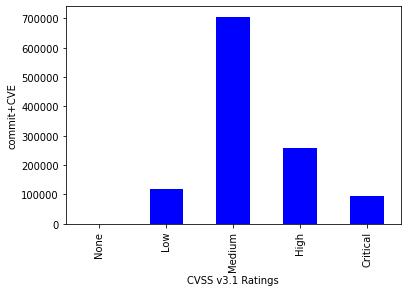

In [152]:
merged_cvss31r_value_counts=merged_df.value_counts('CVSS v3.1 Ratings')[['None','Low','Medium','High','Critical']]
merged_cvss31r_value_counts.plot(kind='bar', ylabel='commit+CVE',color='b')

In [153]:
merged_cvss_count=merged_df['cvss'].count()
print(f"medged_df.shape = {merged_df.shape}")
print(f"merged_cvss_count={merged_cvss_count}")
print("")

cvss31r_ratings=['None','Low','Medium','High','Critical']

merged_cvss31r_value_counts_perc=100.0*merged_df.value_counts('CVSS v3.1 Ratings')[cvss31r_ratings]/merged_cvss_count
merged_cvss31r_value_counts_perc

medged_df.shape = (1196877, 19)
merged_cvss_count=1177364



CVSS v3.1 Ratings
None         0.004247
Low         10.093650
Medium      59.941785
High        22.005769
Critical     7.954549
dtype: float64

In [154]:
100.0*merged_cvss_count/merged_df.shape[0]

98.36967374258174

In [297]:
for col in cvss_factor_columns:
    print(merged_df.value_counts(col))
    print('')

access.authentication
NONE        1082202
SINGLE        94937
MULTIPLE        225
dtype: int64

access.complexity
LOW       695879
MEDIUM    431344
HIGH       50141
dtype: int64

access.vector
NETWORK             838004
LOCAL               310398
ADJACENT_NETWORK     28962
dtype: int64

impact.availability
PARTIAL     550792
COMPLETE    336091
NONE        290481
dtype: int64

impact.confidentiality
PARTIAL     486765
NONE        453449
COMPLETE    237150
dtype: int64

impact.integrity
NONE        516896
PARTIAL     444422
COMPLETE    216046
dtype: int64



In [298]:
for col in cvss_factor_columns:
    print(100.0*merged_df.value_counts(col)/merged_cvss_count)
    print('')

access.authentication
NONE        91.917368
SINGLE       8.063522
MULTIPLE     0.019110
dtype: float64

access.complexity
LOW       59.104831
MEDIUM    36.636418
HIGH       4.258751
dtype: float64

access.vector
NETWORK             71.176289
LOCAL               26.363809
ADJACENT_NETWORK     2.459902
dtype: float64

impact.availability
PARTIAL     46.781794
COMPLETE    28.546057
NONE        24.672149
dtype: float64

impact.confidentiality
PARTIAL     41.343629
NONE        38.513918
COMPLETE    20.142454
dtype: float64

impact.integrity
NONE        43.902820
PARTIAL     37.747205
COMPLETE    18.349975
dtype: float64



In [155]:
print(commits_df_filename)
print(df_filename)

../../data/commits_with_published_cve_df
../../data/unique_cve_info-cvss_cwe_etc.parquet


In [156]:
merged_df_filename='../../data/commits_with_published_cve-merge-cve_info.parquet'
merged_df_filename

'../../data/commits_with_published_cve-merge-cve_info.parquet'

In [157]:
merged_df.to_parquet(merged_df_filename)